<a href="https://colab.research.google.com/github/JvdAli/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - EDA/Regression/Classification/Supervised
##### **Contribution**    - Individual

# **Project Summary -**

<b>The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 3,390 records and 17 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>

# **GitHub Link -**

**Github Link:**    [Team Github link ](https://github.com/JvdAli/Cardiovascular_Risk_Prediction)

# **Problem Statement**


## <b>Data Description </b>
### <b>Demographic:</b>



*   Sex: male or female("M" or "F")
*   Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### <b>Behavioral:</b>
*   is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### <b>Medical( history):</b>
*   BP Meds: whether or not the patient was on blood pressure medication (Nominal)
*   Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
*   Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
*   Diabetes: whether or not the patient had diabetes (Nominal)

### <b>Medical( current):</b>
*   Tot Chol: total cholesterol level (Continuous)
*   Sys BP: systolic blood pressure (Continuous)
*   Dia BP: diastolic blood pressure (Continuous)
*   BMI: Body Mass Index (Continuous)
*   Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)
*   Glucose: glucose level (Continuous)

### <b>Predict variable (desired target):</b>
*   10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

# ***Step1 - Understanding the raw data***

##<b>  Importing Essential Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek

## Mounting Drive - Dataset Loading

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading Dataset

In [ ]:
# Defining url of saved csv file
url = '/content/drive/MyDrive/Capstone Projects/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv'

# reading dataset using panda library
df = pd.read_csv(url)

## Understanding Your Variables

In [ ]:
# Checking shape of dataframe
df.shape

(3390, 17)

### **Observation**


*   Dataset contains : 3,390 rows  & 17 columns




In [ ]:
# Checking top 5 records in dataframe
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Checking bottom 5 records in dataframe
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
#looking for the data types & non null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**Observation**
Dataset is having very less null values , only below columns have null values    
*   education        
*   cigsPerDay
*   BPMeds           
*   totChol          
*   BMI              
*   heartRate        
*   glucose   

In [ ]:
#looking at the min, max values,mean values etc.
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# Check Unique Values for each variable.
print(df.apply(lambda col: col.unique()))

id                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
age                [64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 5...
education                                  [2.0, 4.0, 1.0, 3.0, nan]
sex                                                           [F, M]
is_smoking                                                 [YES, NO]
cigsPerDay         [3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0,...
BPMeds                                               [0.0, nan, 1.0]
prevalentStroke                                               [0, 1]
prevalentHyp                                                  [0, 1]
diabetes                                                      [0, 1]
totChol            [221.0, 212.0, 250.0, 233.0, 241.0, 272.0, 238...
sysBP              [148.0, 168.0, 116.0, 158.0, 136.5, 182.0, 232...
diaBP              [85.0, 98.0, 71.0, 88.0, 121.0, 136.0, 68.0, 7...
BMI                [nan, 29.77, 20.35, 28.26, 26.42, 32.8, 24.83,...
heartRate          [90.0, 72.0, 88

### **Observation**
*   **id** number for each patient will not be used for prediction hence we can drop it.
*   Categorial columns are as follows
> *   sex
> *   is_smoking
> *   prevalentStroke
> *   BPMeds
> *   prevalentHyp
> *   diabetes  
> *   education   





In [ ]:
# creating a copy of our dataset
df1=df.copy()

In [ ]:
# Dropping the id column permanently from the dataset because it just contains unique id number for each patient and it will not be used for prediction
df1.drop(columns=['id'], inplace=True)

In [ ]:
# Checking shape of dataframe again
df1.shape

(3390, 16)

#### Missing Values Treatment

In [ ]:
# Calculating Missing data counts and their percentage
missing = df1.columns[df1.isnull().any()].tolist()                              # to filter out columns with missing data points and convert it into a list(with column headers)

print('Missing Data Count')
print(df1[missing].isnull().sum().sort_values(ascending = False))               # adding all null values in a column and sorting in descending order , doing for all abv filtered columns

print('\n','--'*12,'\n')

print('Missing Data Percentage')
print(round(df1[missing].isnull().sum().sort_values(ascending = False)/len(df1)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64

 ------------------------ 

Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [ ]:
# Re-placing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  df1[col] = df1[col].fillna(df1[col].median())

In [ ]:
#Checking whether all got filled or not i.e. each column is now having 3390 values = number of rows of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


#### Exploratory Data Analysis


In [ ]:
# Lets check the discrete and continuous features/columns
categorical_features = [i for i in df1.columns if df1[i].nunique()<=4]
numeric_features = [i for i in df1.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


## **Handling Outliers**

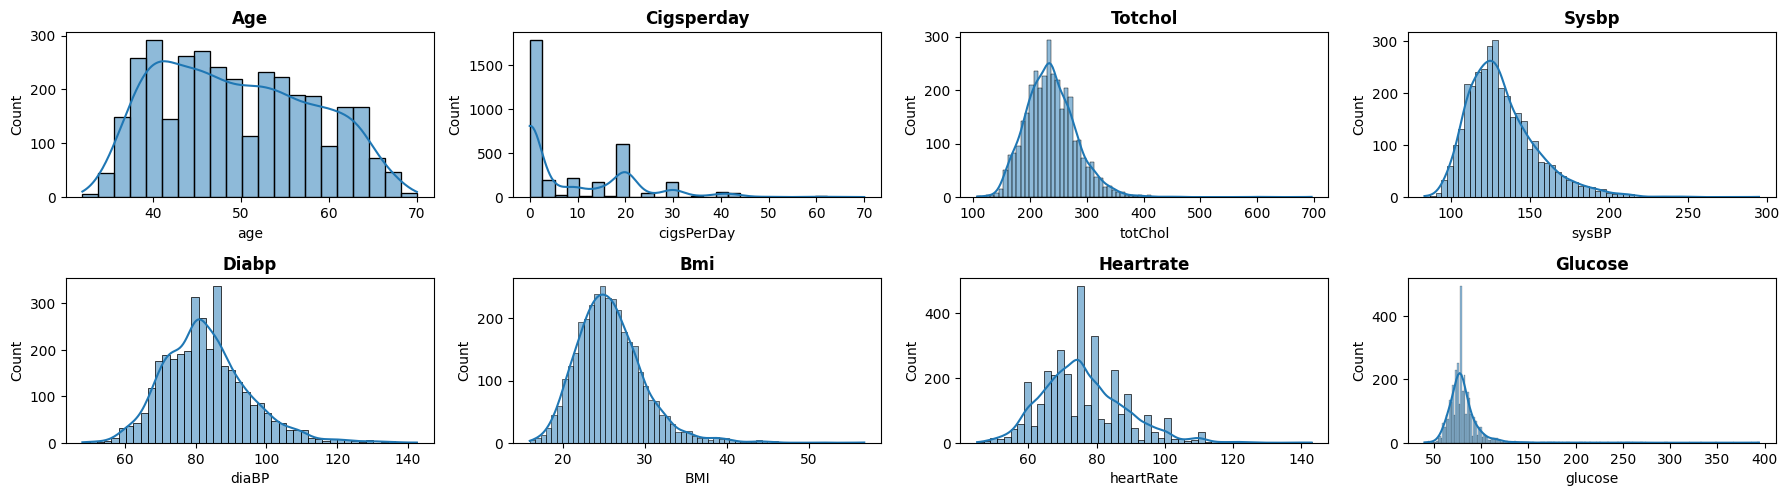

In [ ]:
# Visualization the distribution using histograph

plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.histplot(df1[column],kde=True)          #kde=True -->smoothed representation ,KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable.
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

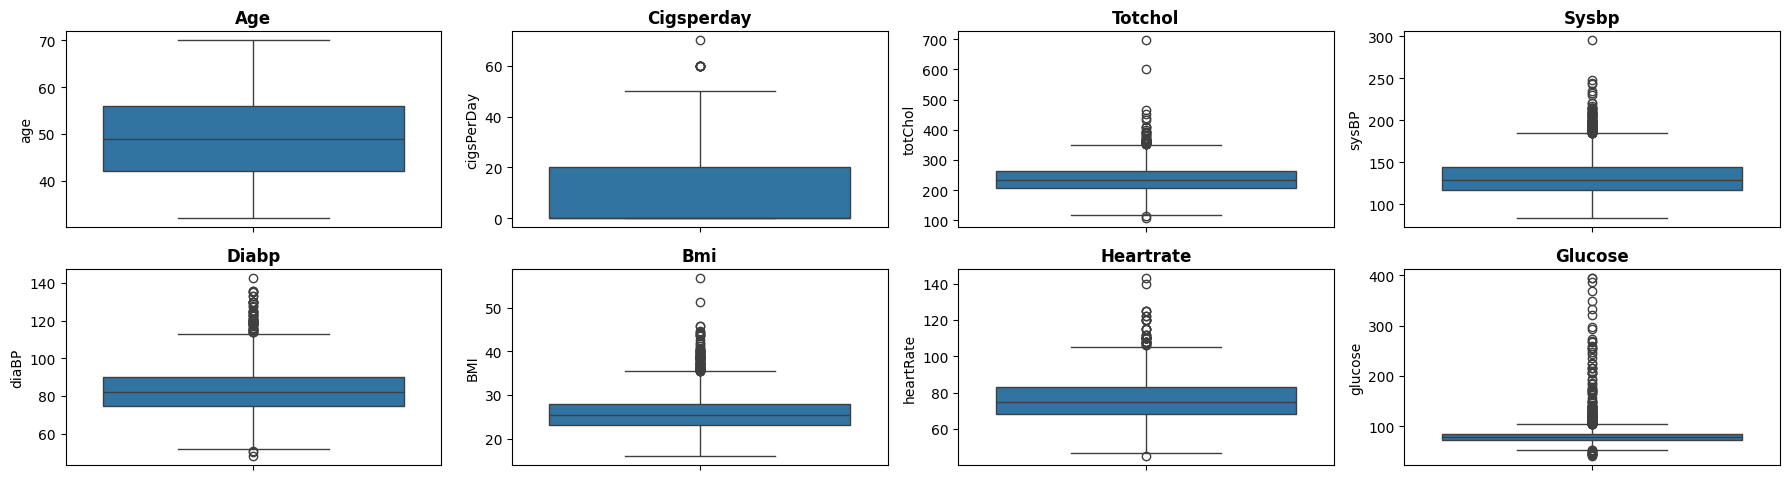

In [ ]:
# Visualization outliers using Boxplot

plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df1[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
# Outliers treatment using IQR method and median.

df2 = df1.copy()
for col in numeric_features:
  q1, q3, median = df2[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  df2[col] = np.where(df2[col] > upper_limit, median,np.where(df2[col] < lower_limit,median,df2[col]))  # two np.where function is used , inner and outer

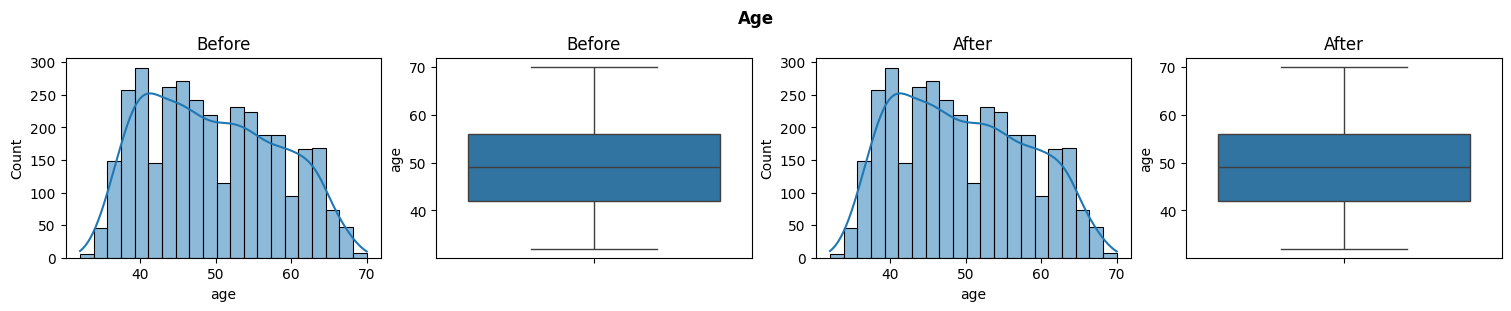

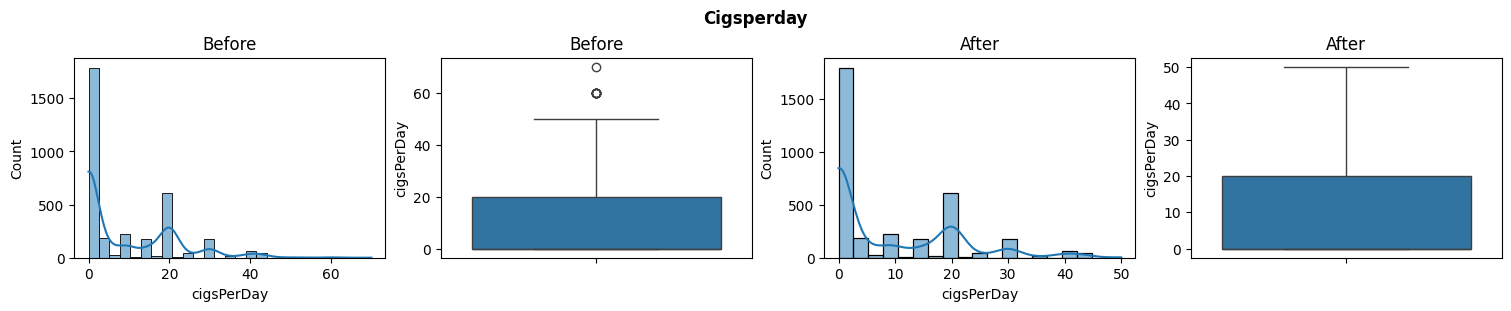

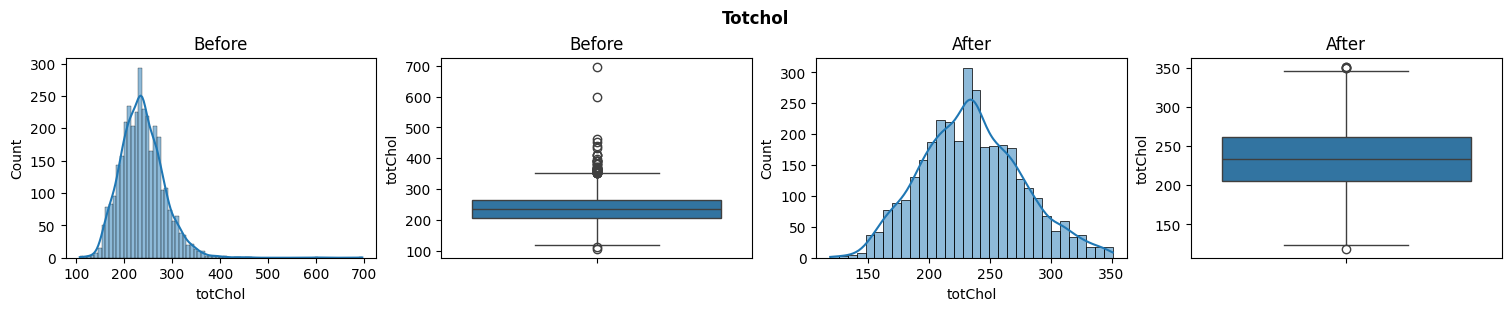

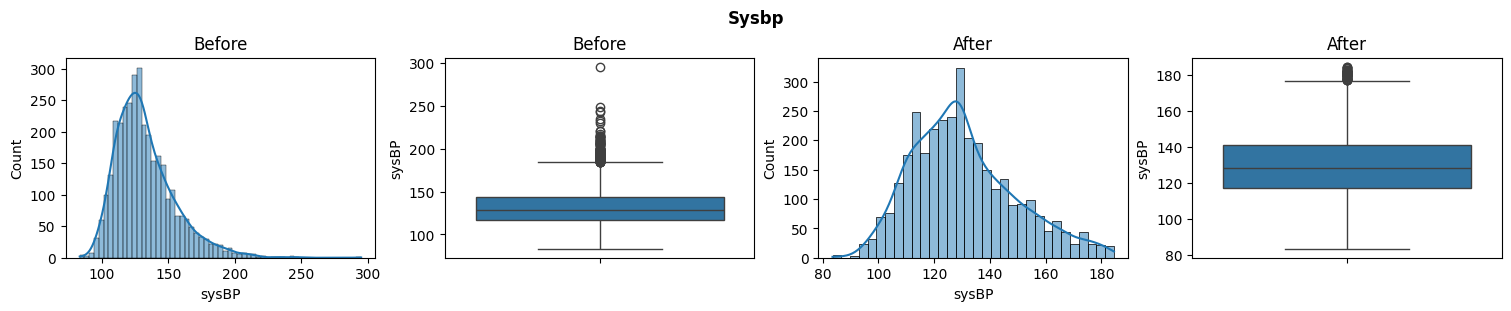

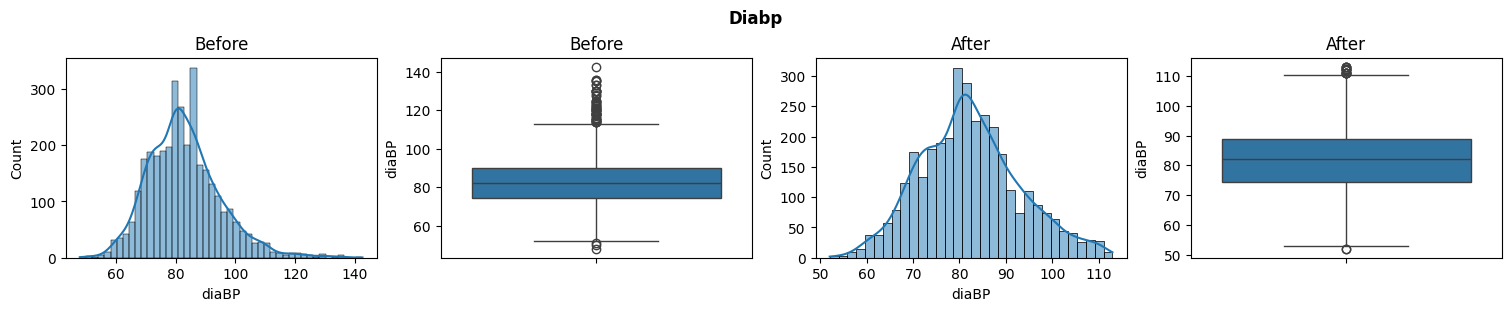

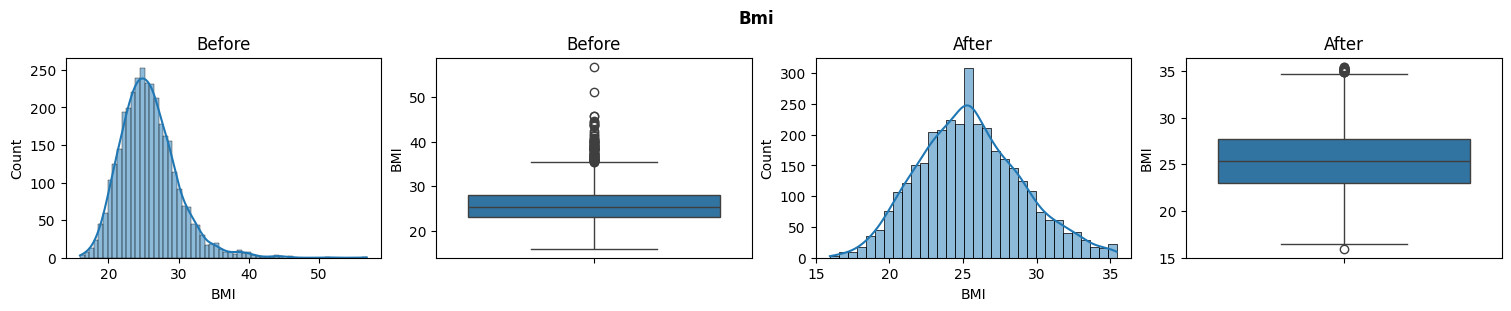

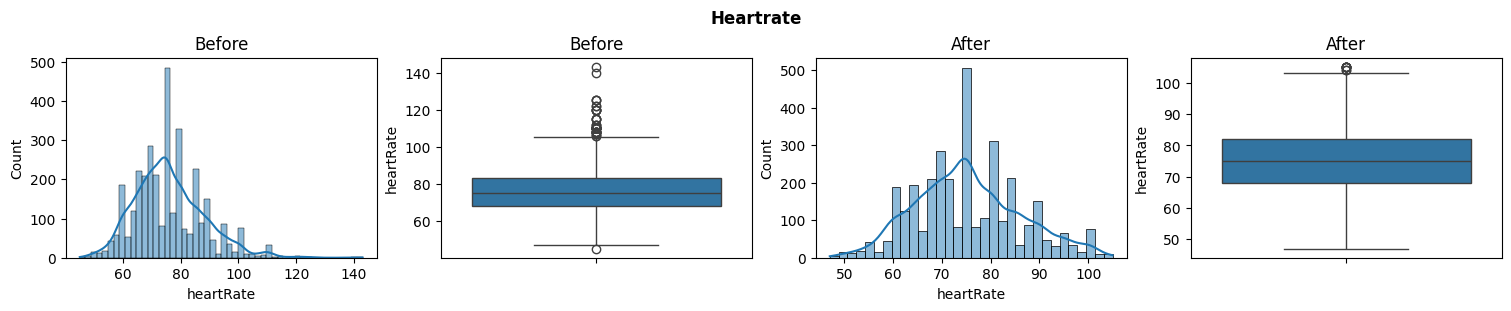

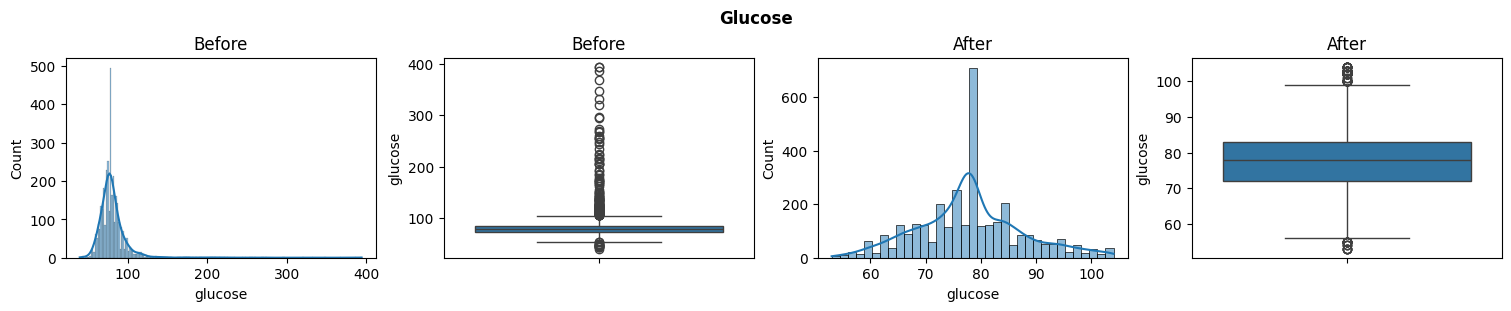

In [ ]:
# Plotting Graphs Before & After treating outliers

#Before treating outliers
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.histplot(df1[col], ax=ax[0],kde=True).set(title="Before")
  sns.boxplot(df1[col], ax=ax[1]).set(title="Before")

  # After treating outliers
  sns.histplot(df2[col], ax=ax[2],kde=True).set(title="After")
  sns.boxplot(df2[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

## ***Data Wrangling***

**Cleaning and Manipulating dataset**

In [ ]:
# Checking duplicates rows/records
print(len(df2[df2.duplicated()]))

0


In [ ]:
# Checking unique value with their counts in categorical features
for col in ['sex', 'is_smoking']:
  print(df2[col].value_counts(),'\n')

sex
F    1923
M    1467
Name: count, dtype: int64 

is_smoking
NO     1703
YES    1687
Name: count, dtype: int64 



In [ ]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df2 = df2.replace(encoder)

In [ ]:
# New look
df2.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36.0,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46.0,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50.0,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64.0,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##**Univariate Analysis**

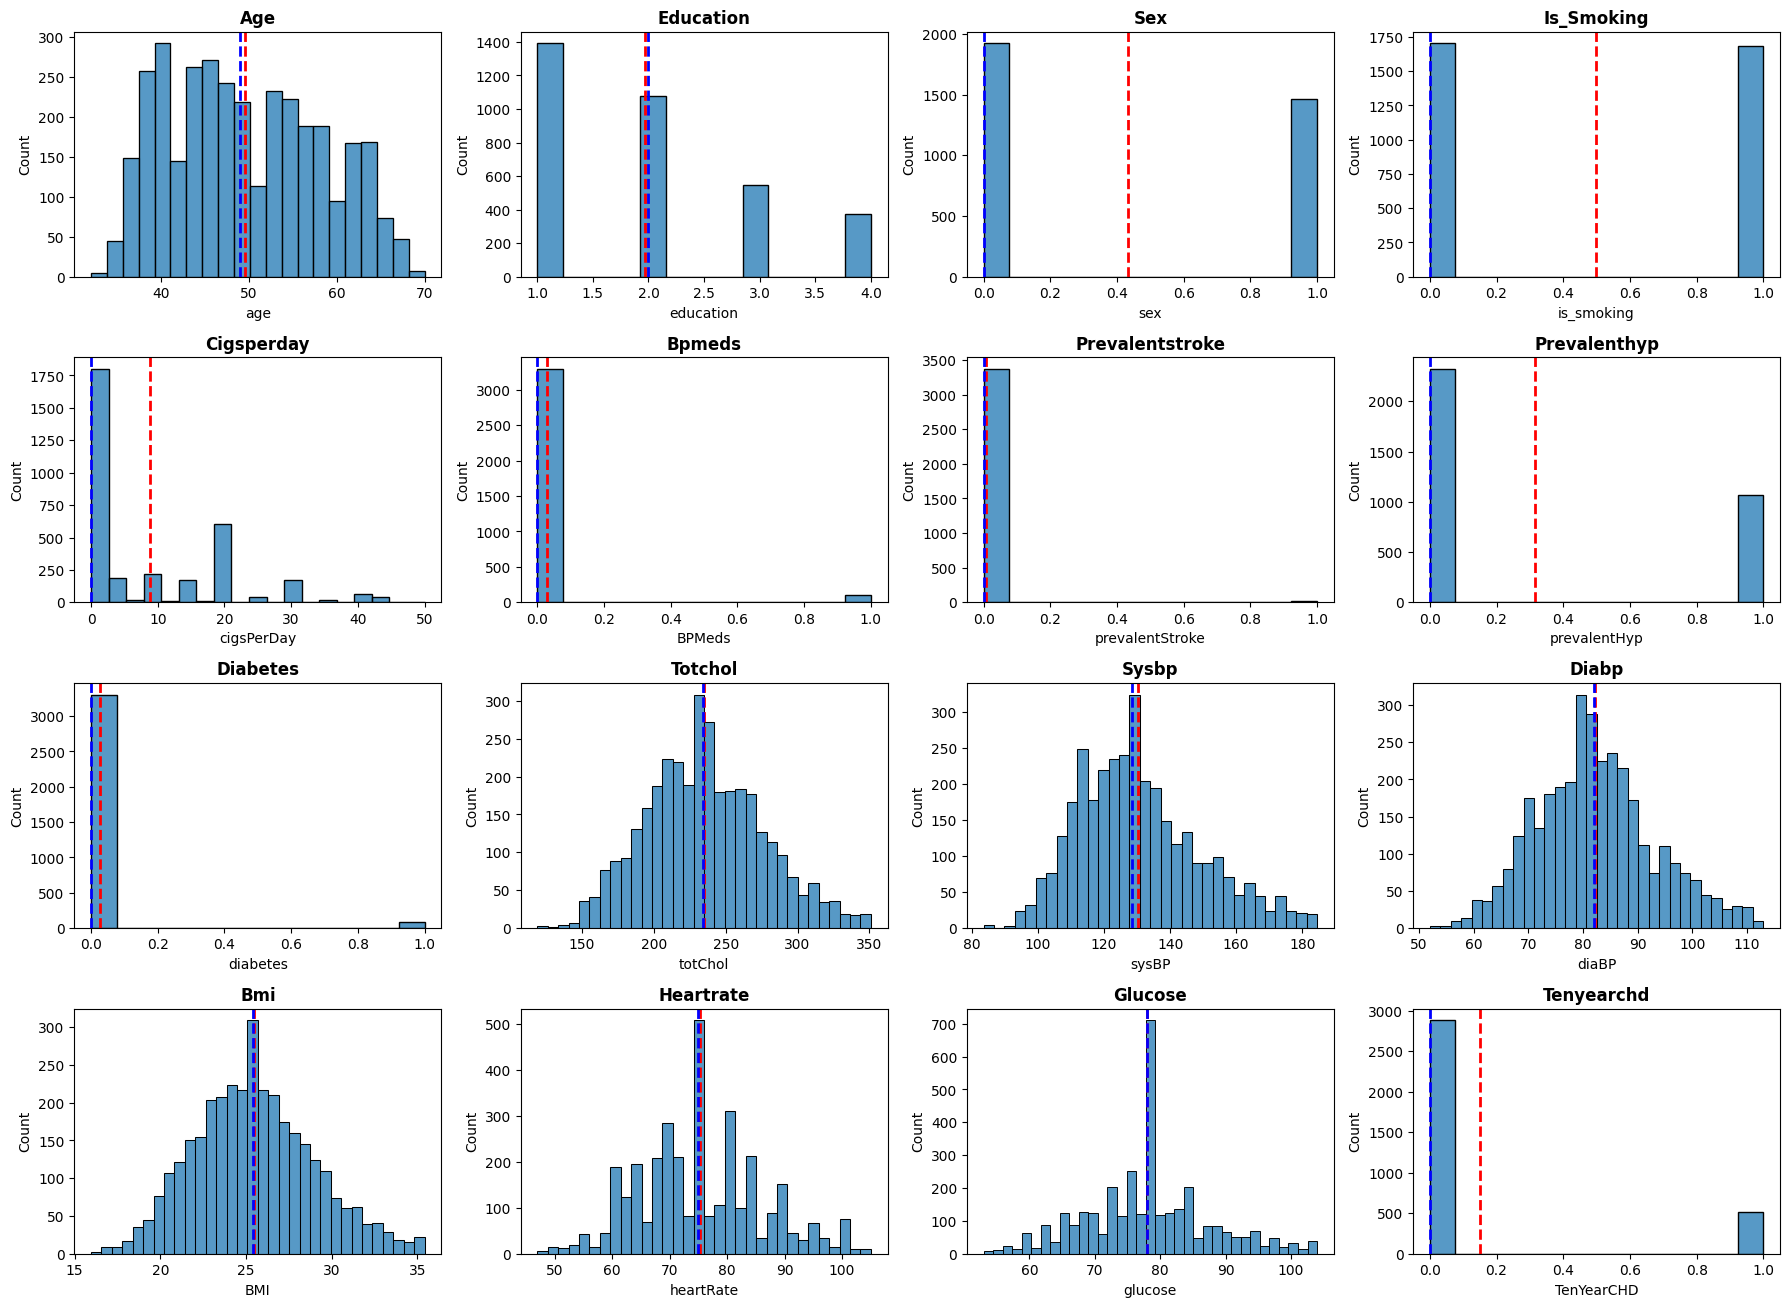

In [ ]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(df2.columns):
  feature = df2[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

**Observations:**



*   Most of the people in our dataset are around 40-50 years old.
*   Data for Female population is more than that of males.
*   There are equal number of smokers and non-smokers in the dataset.
*   Most people smoke less than 10 cigarettes per day.
*   Very few people are on blood pressure medication, diabetes and had previously a stroke.
*   Rest all the feature appear to be normally distributed.
*   Also in the dataset provided, very few number of people have the risk of Coronary heart Disease. So we will have to deal with the class imbalance problem as well.

##**Bivariate Analysis**

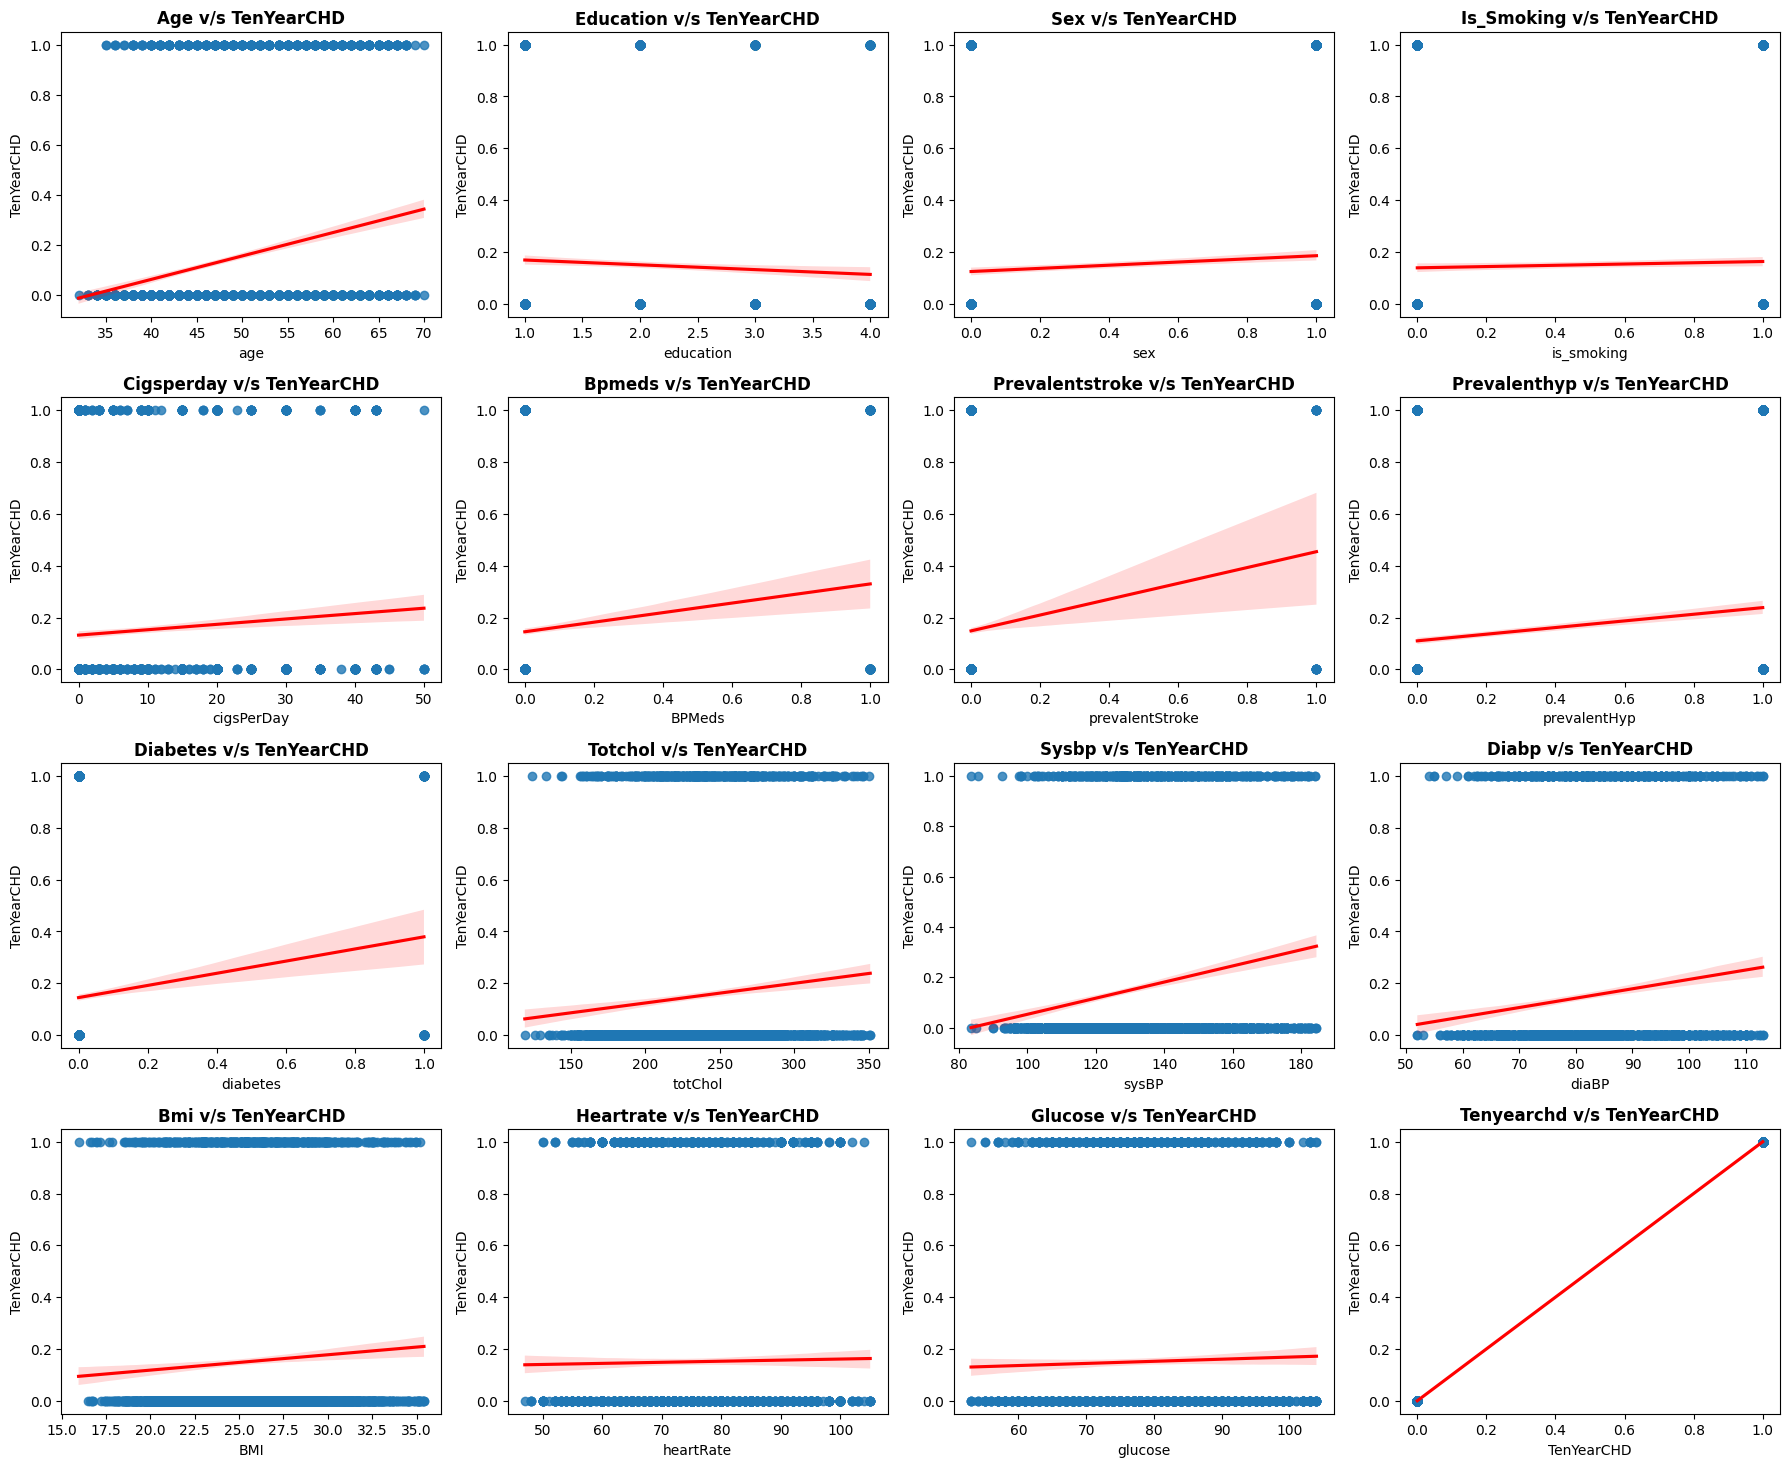

In [ ]:
# Checking Linearity
independent_variables = [i for i in df2.columns if i not in ['TenYearCHD']]

plt.figure(figsize=(18,18))
for n,column in enumerate(df2.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df2[column], y =df2['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

##**Removing Multi-collinearity**

In [ ]:
# Defining a function to calculate Variance Inflation factor(VIF)
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))



*   VIF(Variance Inflation Factor) determines the strength of the correlation between the independent variables.
*   It is predicted by taking a variable and regressing it against every other variable.
*   VIF score of an independent variable represents how well the variable is explained by other independent variables.

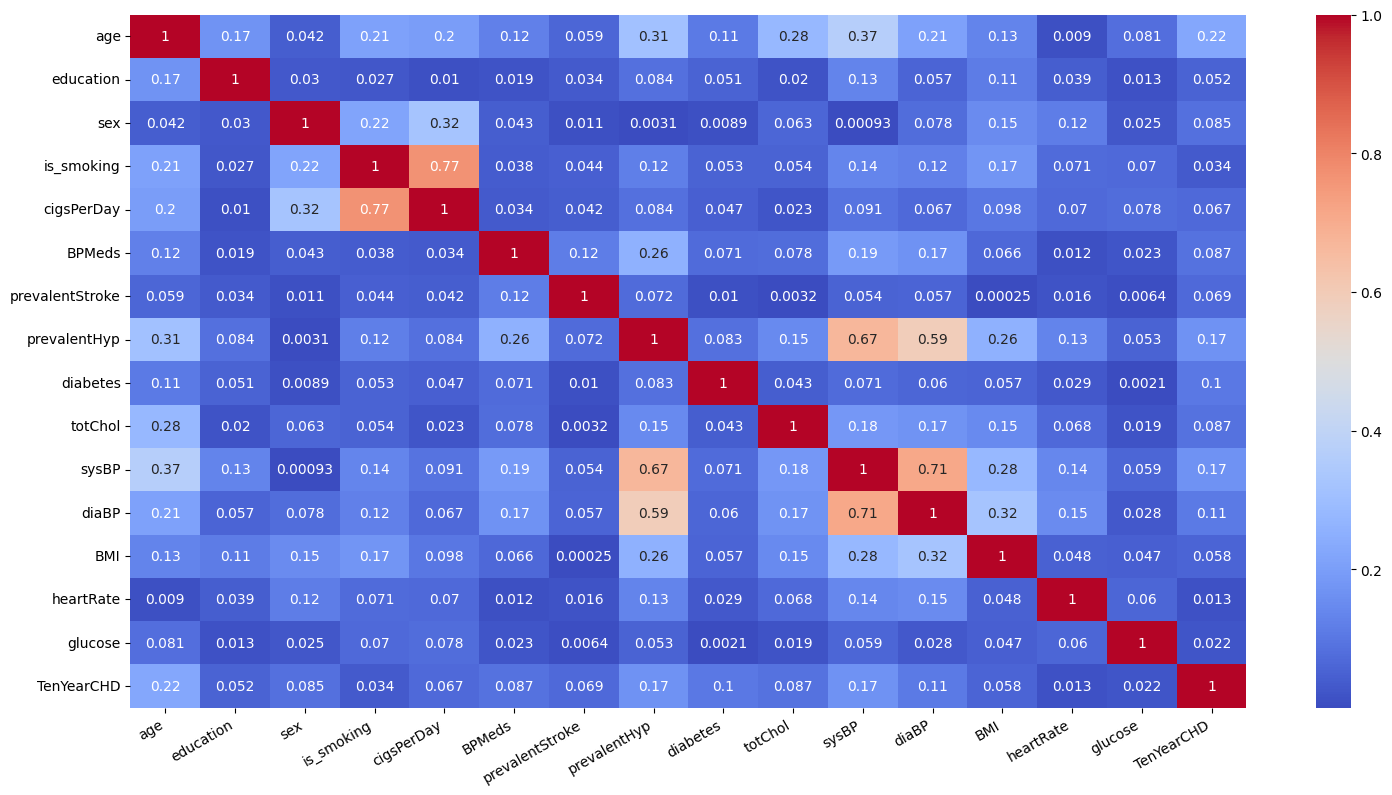

In [ ]:
# Checking correlations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df2.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

From the heatmap, we can identify strong relationships between:

1.   cigsPerDay and is_smoking
2.   sysBP and prevalentHyp
3.   diaBP and prevalentHyp
4.   diaBP and sysBP

We can see some highly correlated features. Lets treat them by excluding them from dataset and checking the variance inflation factors.

In [ ]:
# Checking VIF for each variable
independent_variables = [i for i in df2.columns if i not in ['TenYearCHD']]
calc_vif(df2[independent_variables])

,variables,VIF
0,sysBP,132.679399
1,diaBP,127.335444
2,BMI,58.839938
3,glucose,55.695887
4,heartRate,47.760133
5,age,42.764967
6,totChol,37.646845
7,is_smoking,4.955409
8,education,4.831856
9,cigsPerDay,4.195606


*   Checking the multicollinearity between all
the features, there are some features which
are highly correlated with each other like
is_smoking and cigsperday and so on.
*   To handle the multicollinearity we have used
VIF score of all independent variable which
represents how well the variable is
explained by other independent variables.
*   we have excluded the features whose VIF
score is higher than 10. Pictures in the left
and right shows the VIF scores of variables
before and after multicollinearity treatment.

In [ ]:
# features highly correlated , to be considered for removing, VIF score greater than 10...
considered_features = ['TenYearCHD','sysBP','diaBP','glucose','BMI','totChol','heartRate','is_smoking']
independent_variables = [i for i in df2.columns if i not in considered_features]
calc_vif(df2[independent_variables])

,variables,VIF
0,age,5.513455
1,education,4.100370
2,sex,1.968156
3,cigsPerDay,1.733136
4,prevalentHyp,1.686226
5,BPMeds,1.120401
6,diabetes,1.044716
7,prevalentStroke,1.024945


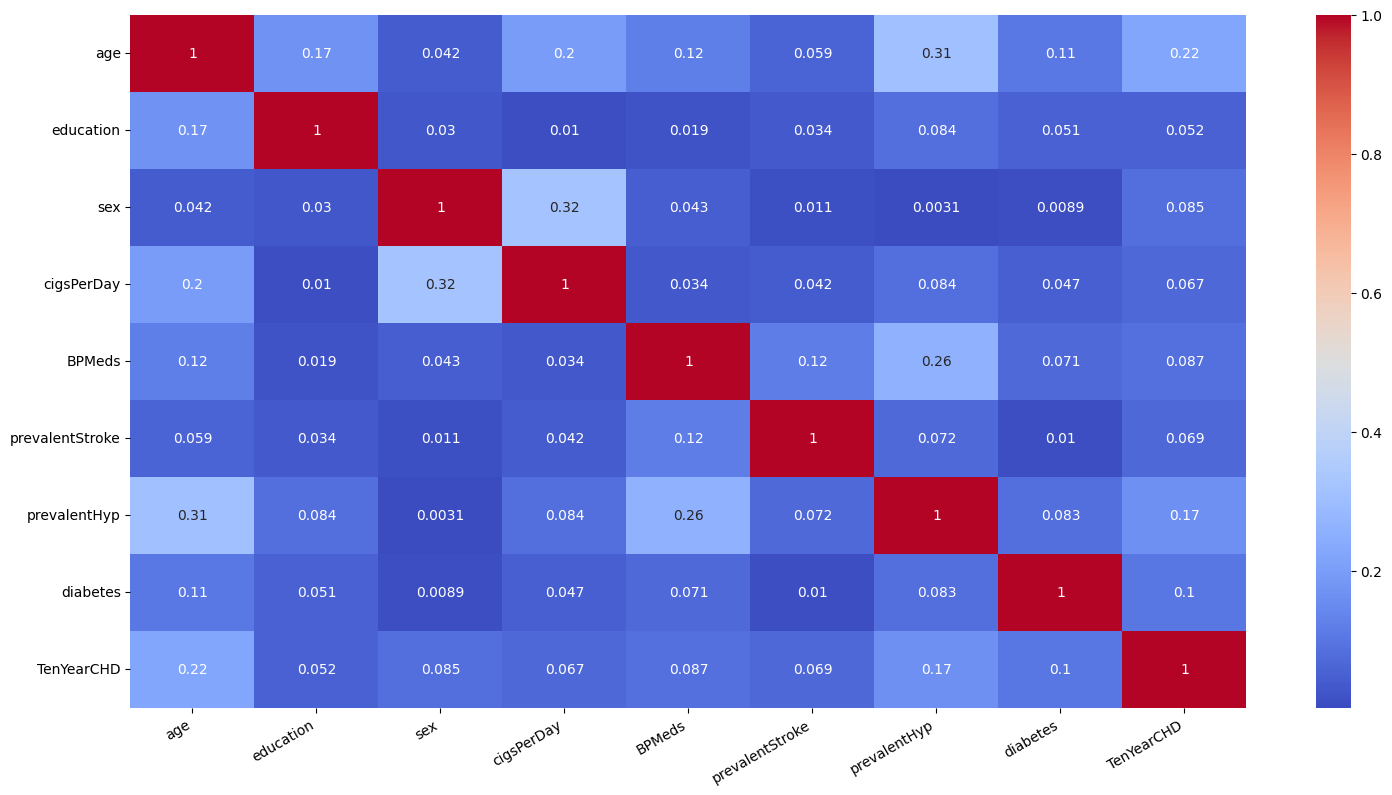

In [ ]:
# UPDATED HEATMAP
df2 = df2[independent_variables + ['TenYearCHD']]

#checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df2.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [ ]:
# Checking top 5 rows of the cleaned dataset
df2.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,64.0,2.0,0,3.0,0.0,0,0,0,1
1,36.0,4.0,1,0.0,0.0,0,1,0,0
2,46.0,1.0,0,10.0,0.0,0,0,0,0
3,50.0,1.0,1,20.0,0.0,0,1,0,1
4,64.0,1.0,0,30.0,0.0,0,0,0,0


##**MODEL BUILDING PREREQUISITES**

*   Using Minmax scaler for scaling the features.
*   Making a variable to define F1 score of class 1 of the target variable so as to use it at the time of
hyperparameter tuning because by default Gridsearch will maximize the Macro Average of F1 score for
all classes. However we want to maximize the F1 score of class 1.
*   Defining X and Y variables, and splitting the data in 80-20 ratio as train and test sets.
*   Handling class imbalance by oversampling using SMOTE followed by removing the Tomek links. Finally
Checking value counts for both classes Before and After handling Class Imbalance.
*   Defining a function which takes classifier model and train test splits as input and outputs the
classification report for model performance on train and test data. Also plots the feature importance.

In [ ]:
# Defining variables required
scaler = MinMaxScaler()
scoring = make_scorer(f1_score, pos_label=1)
features = [i for i in df2.columns if i not in ['TenYearCHD']]

# Splitting the data into train and test
X = scaler.fit_transform(df2[independent_variables])
y = df2['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

# Handling class imbalance by oversampling followed by removing the Tomek link
X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
TenYearCHD
0    2305
1     407
Name: count, dtype: int64 

After Handling Class Imbalace:
TenYearCHD
0    2199
1    2199
Name: count, dtype: int64 



In [ ]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = independent_variables
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
    plt.title(f'{label} Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')

    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

##**Logistic Regression**

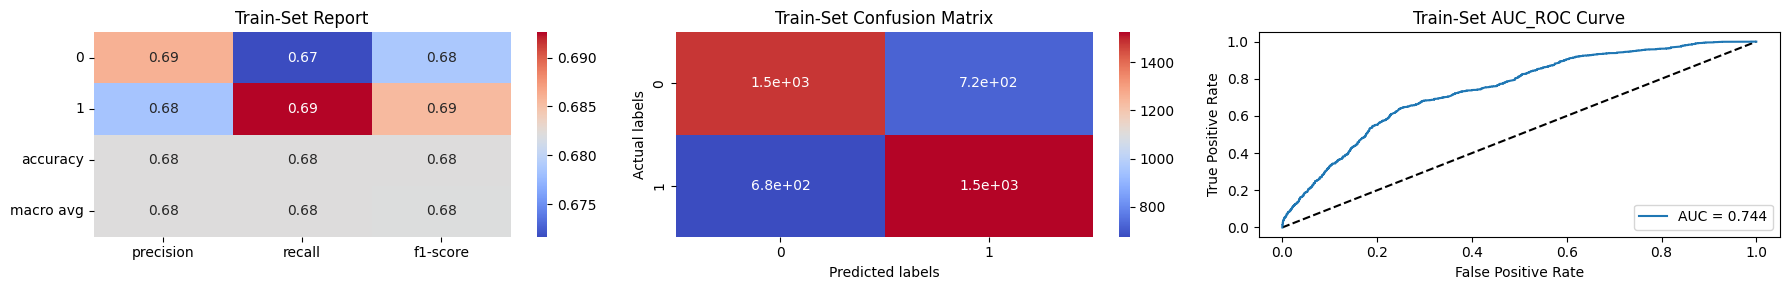

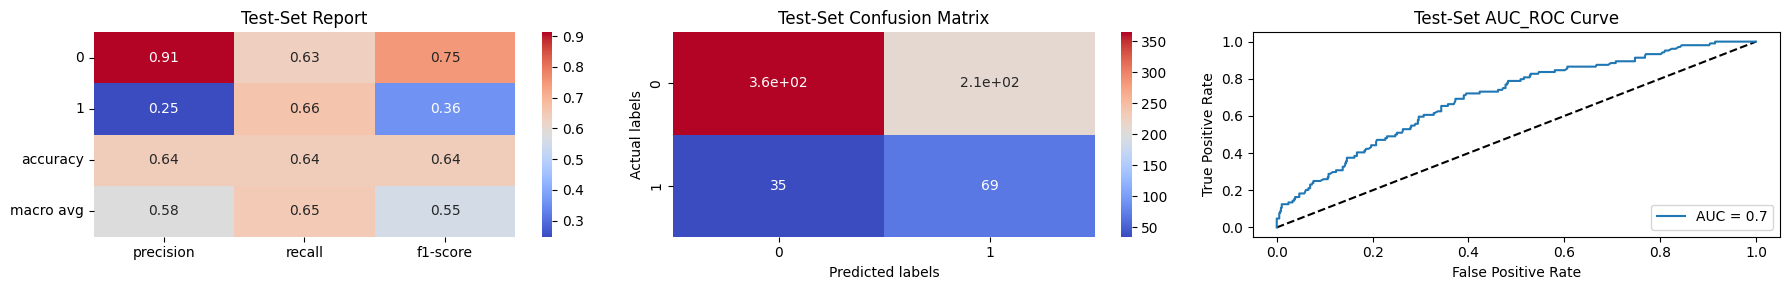

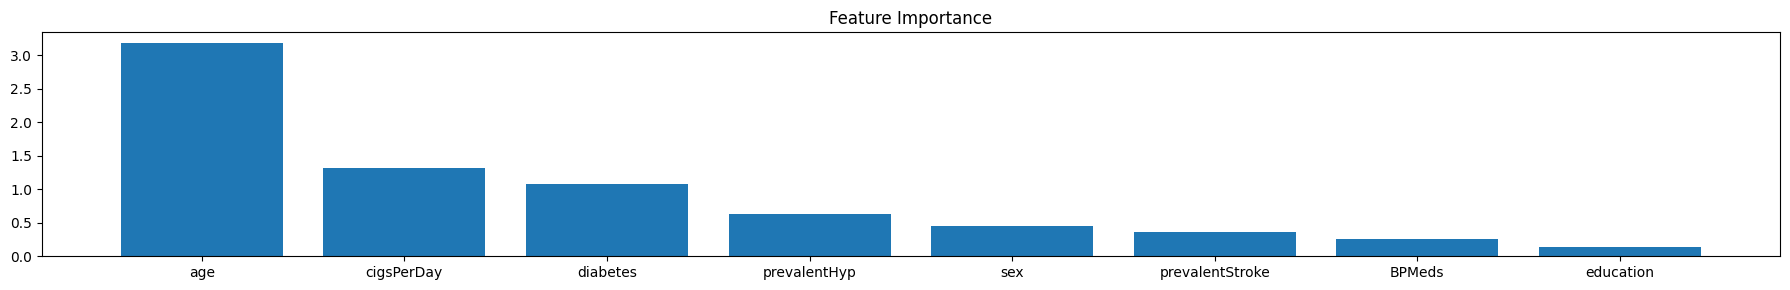

LogisticRegression(max_iter=10000)

In [ ]:
# Fitting Logistic Regression Model
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
analyse_model(lr, X_smote, X_test, y_smote, y_test)

## **Conclusion:**



*   Starting with the quick and dirty models first, then proceeding towards the complex models. Logistic regression outputs following result for class 1 on test data:


> *   Precision - 0.25
> *   Recall – 0.66
> *   F1 Score – 0.36

*   The feature importance plotted is based on the beta coefficients of z (i.e. before applying sigmoid
function).
*   Age is the most influencing feature, followed by CigsPerDay followed by diabetes.




##**Naive Bayes Classifier**

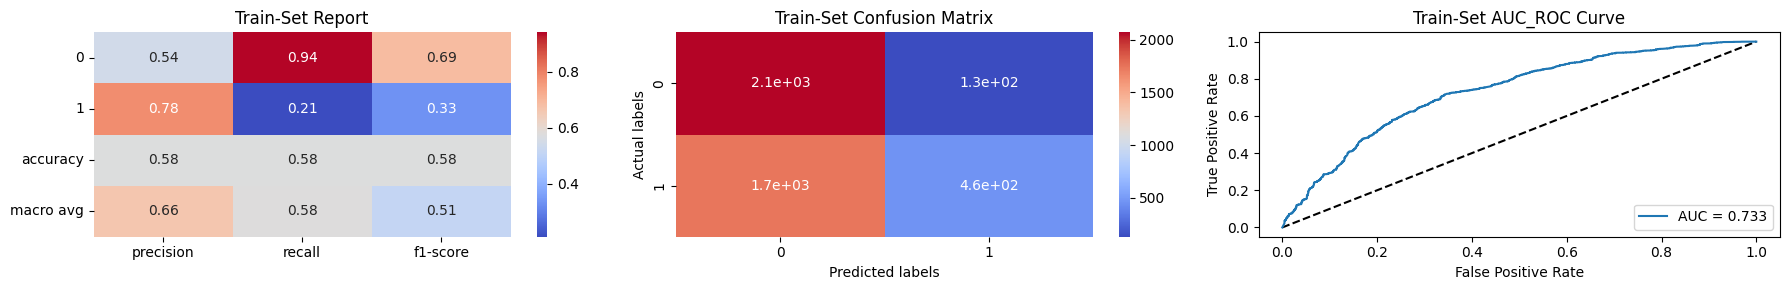

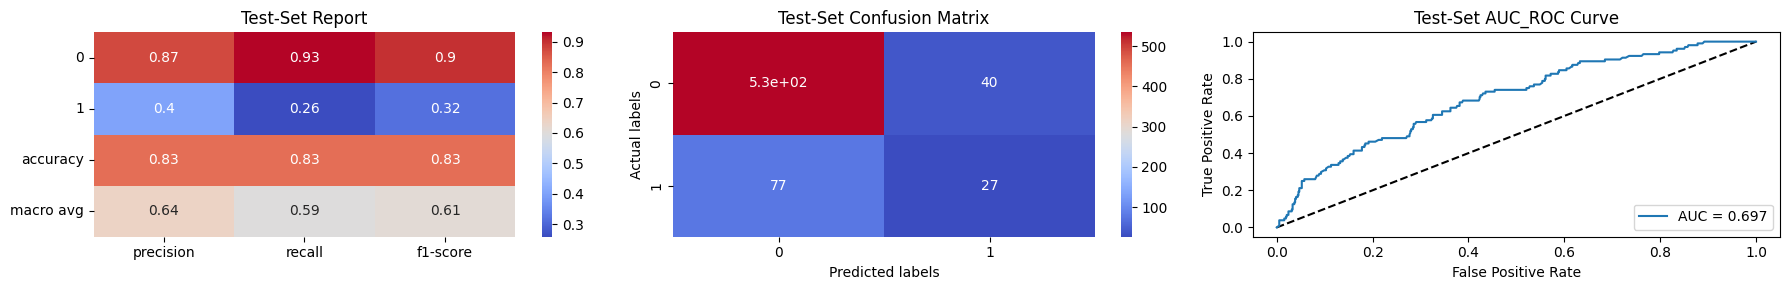

<Figure size 1800x300 with 0 Axes>

GaussianNB()

In [ ]:
# Fitting Naive Bayes Classifier
nbc = GaussianNB()
analyse_model(nbc, X_smote, X_test, y_smote, y_test)

##  **Conclusion:**
*   Naïve Bayes Classifier is very fast to implement and may be used as a baseline model to compare
with different models. It outputs following result for class 1 on test data:
> *   Precision - 0.4
> *   Recall – 0.26
> *   F1 Score – 0.32

##**Support Vector Classifier**

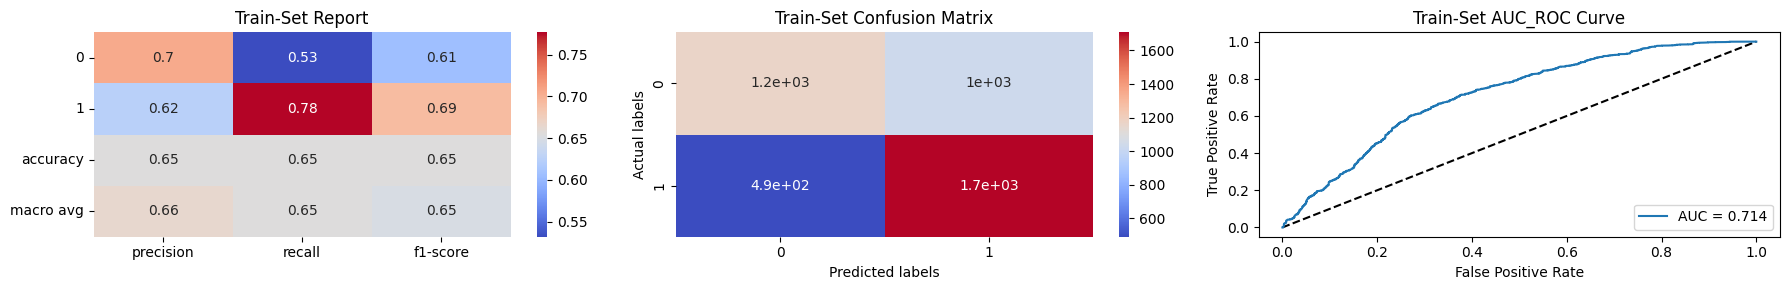

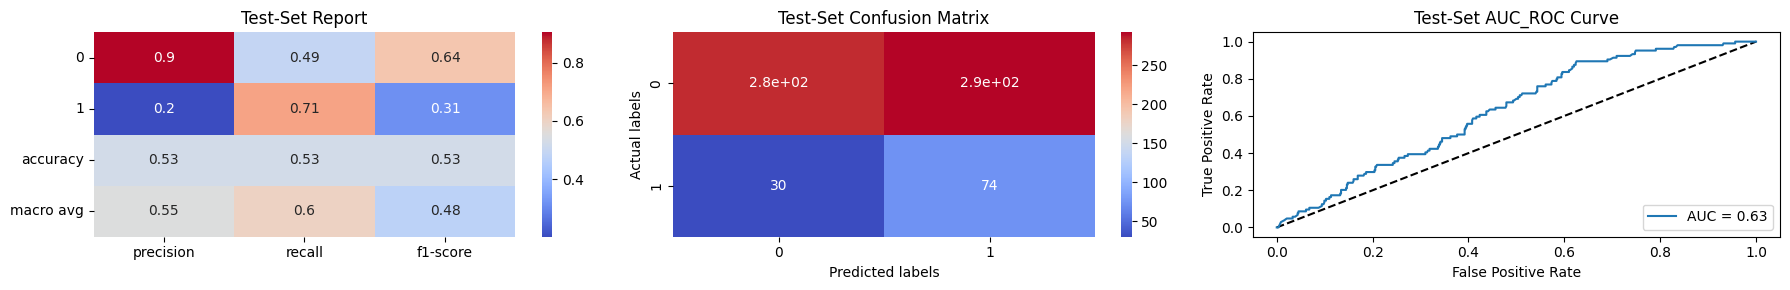

<Figure size 1800x300 with 0 Axes>

SVC(C=0.1, max_iter=1000, probability=True, random_state=0)

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)


# SVM algorithm'
clf = SVC(random_state= 0,probability=True)

# Hyperparameter Grid
grid = {'kernel': ["linear","rbf","poly","sigmoid"],
        'C': [0.1, 1, 10, 100],
        'max_iter' : [1000]}

# GridSearch to find the best parameters
svc = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
svc.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(svc.best_estimator_, X_smote, X_test, y_smote, y_test)

##  **Conclusion:**
*   Support Vector Classifier with C=0.1 outputs following result for class 1 on test data:
> *   Precision - 0.2
> *   Recall – 0.71
> *   F1 Score – 0.31

##**Random Forest Classifier**

In [ ]:
# Splitting the data into train and test by redefining X
X = scaler.fit_transform(df2[features])
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

# Handling class imbalance by oversampling followed by removing the Tomek link
X_smote, y_smote = SMOTETomek(random_state=45).fit_resample(X_train, y_train)

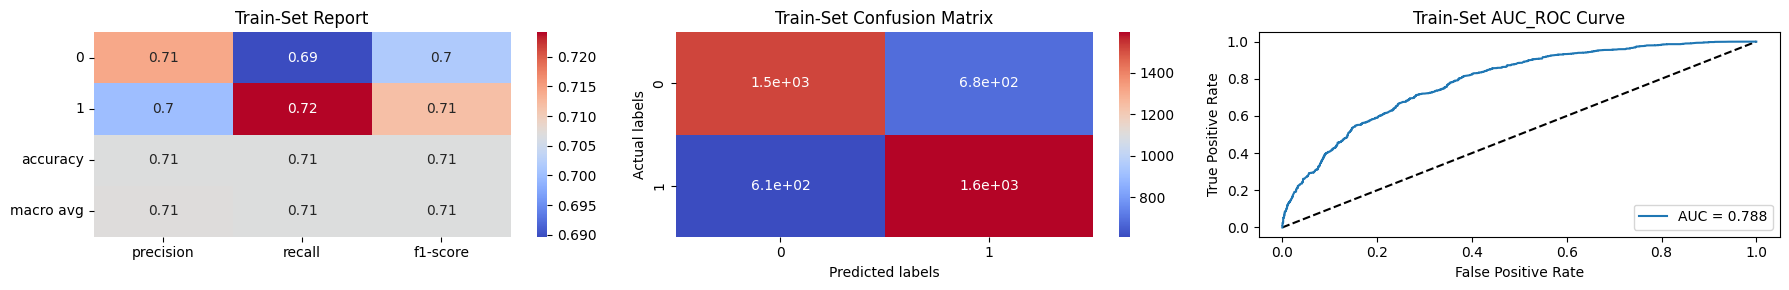

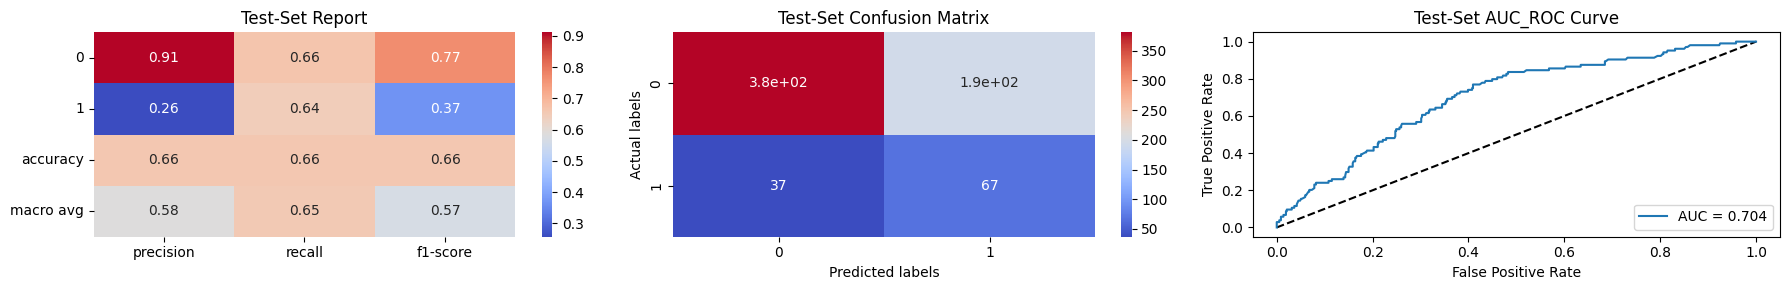

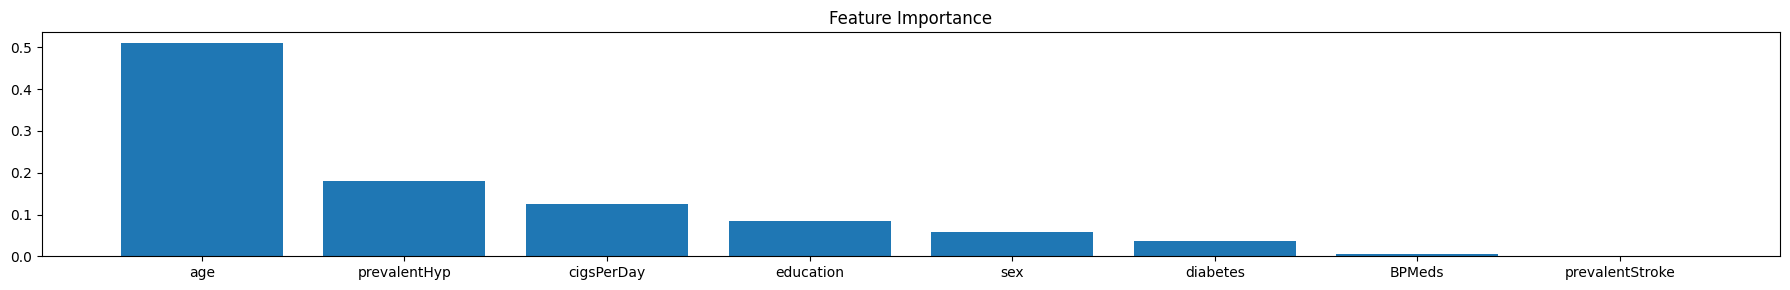

RandomForestClassifier(max_depth=8, min_samples_leaf=46, min_samples_split=50,
                       random_state=2)

In [ ]:
# Classifier
clf = RandomForestClassifier(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : [100,150],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,80],
        'min_samples_leaf' : [46,60]}

# GridSearch to find the best parameters
rf = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
rf.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(rf.best_estimator_, X_smote, X_test, y_smote, y_test)

##  **Conclusion:**
*   RandomForestClassifier(max_depth=8, min_samples_leaf=46, min_samples_split=50) gives following result
for class 1 on test data:
> *   Precision - 0.24
> *   Recall – 0.55
> *   F1 Score – 0.34
*   Age followed by sysBP appear to be the feature with high global importance for most of the trees in the
RandomForest Ensemble.

##**XGBoost Classifier**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:06:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split", "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:06:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split", "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:06:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split", "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:06:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split", "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-p

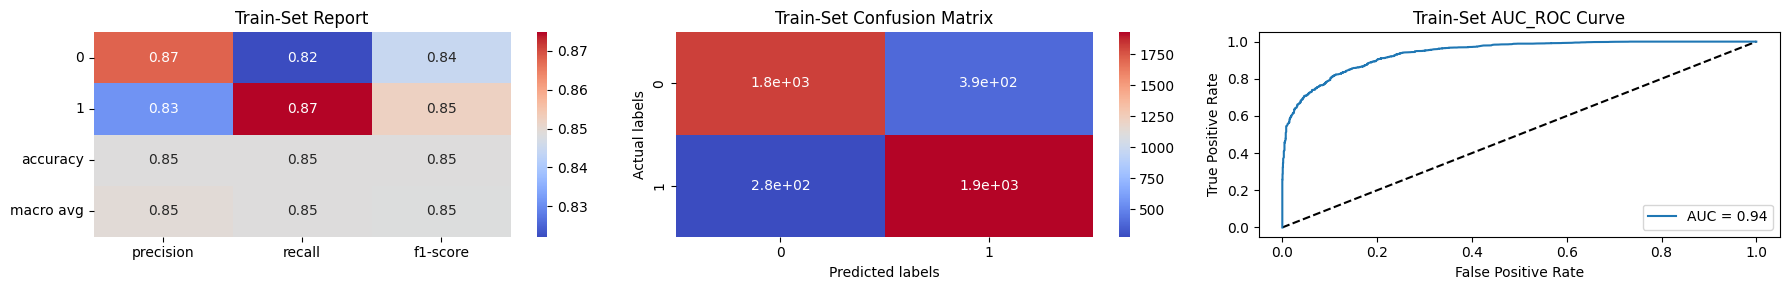

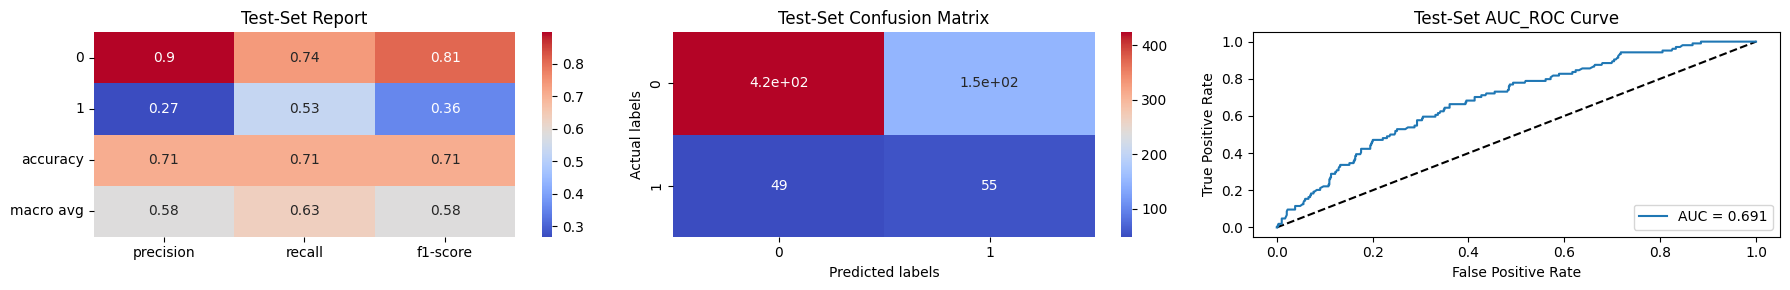

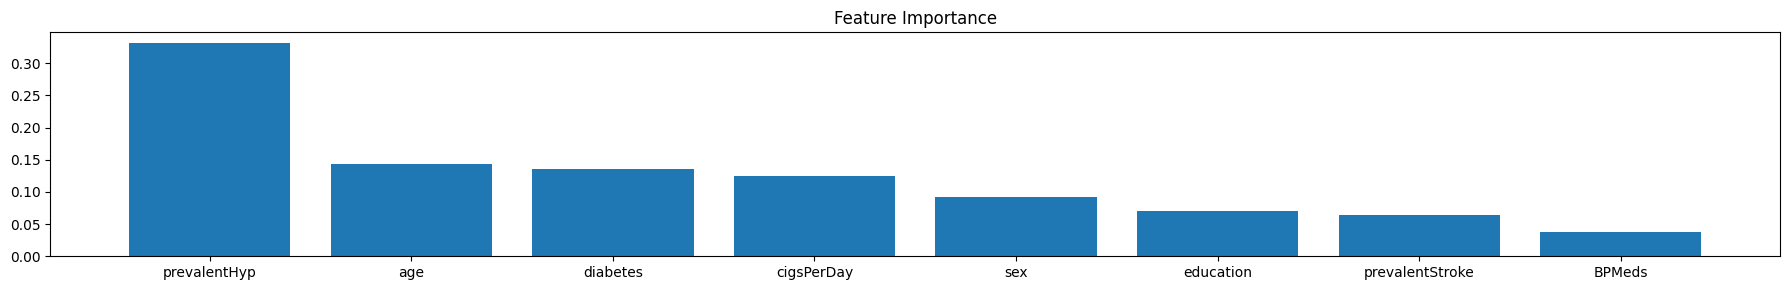

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False, eta=0.05,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=10, max_leaves=None,
                min_child_weight=None, min_samples_leaf=30,
                min_samples_split=50, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=150, n_jobs=None,
                num_parallel_tree=None, ...)

In [164]:
# Classifier
clf = XGBRFClassifier(silent=True, random_state=3)

# Hyperparameter Grid
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
xgb = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
xgb.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(xgb.best_estimator_, X_smote, X_test, y_smote, y_test)

##  **Conclusion:**
*   XGBRFClassifier(eta=0.05, max_depth=10, min_samples_leaf=30, min_samples_split=50,
n_estimators=150) gives following result for class 1 on test data:
> *   Precision - 0.28
> *   Recall – 0.5
> *   F1 Score – 0.36
*   Age and prevalentHyp appear to be the feature with high global importance for most of the trees in the
XGBoost tree Ensemble.

##**KNN Classifier**

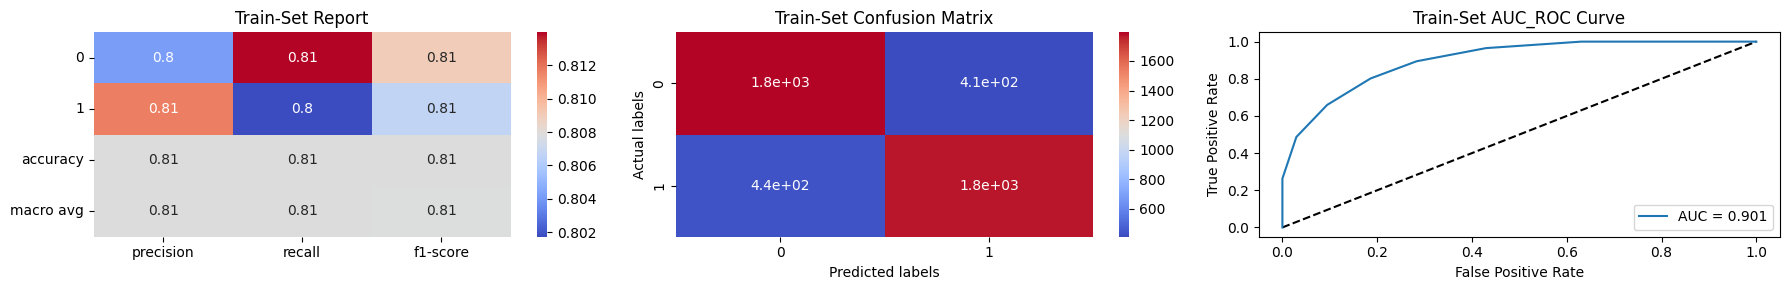

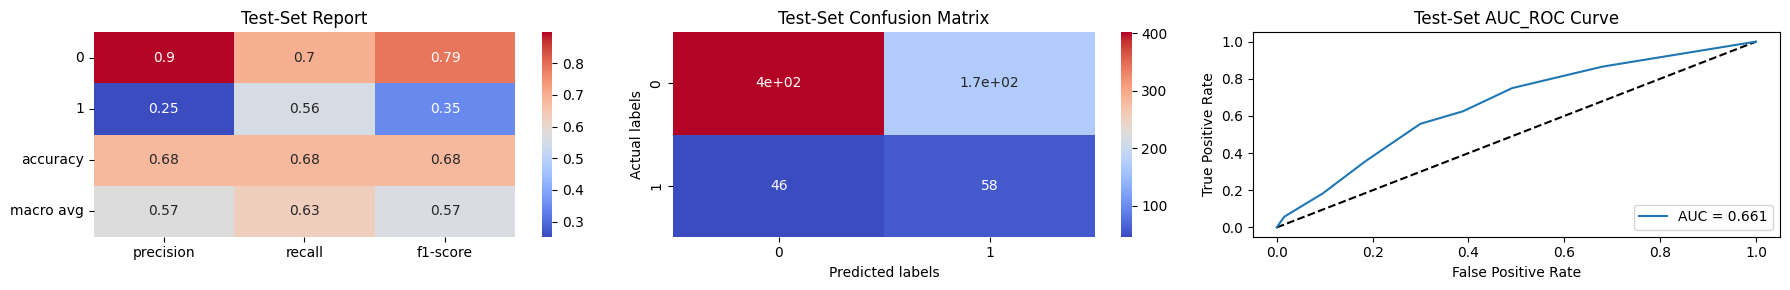

<Figure size 1800x300 with 0 Axes>

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [ ]:
# Classifier
clf = KNeighborsClassifier()

# Hyperparameter Grid
grid = {'n_neighbors' : [5,7,9],
        'metric' : ['minkowski','euclidean','manhattan']}

# GridSearch to find the best parameters
knn = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
knn.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(knn.best_estimator_, X_smote, X_test, y_smote, y_test)

##  **Conclusion:**
KNeighborsClassifier(metric='manhattan’, 'n_neighbors=5) gives following result for class 1 on test data:
> *   Precision - 0.17
> *   Recall – 0.38
> *   F1 Score – 0.23

# **Conclusion**

1. If we want to completely avoid any situations where the patient has heart disease, a high recall is desired. Whereas if we want to avoid treating a patient with no heart diseases a high precision is desired.
2. Assuming that in our case the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, so we want a balance between precision and recall and a high f1 score is desired.
3. Since we have added synthetic datapoints to handle the huge class imbalance in training set, the data distribution in train and test are different so the high performance of models in the train set is due to the train-test data distribution mismatch and not due to overfitting.
4. Best performance of Models on test data based on evaluation metrics for class 1:
  1. Recall - Support Vector Classifier(SVC)
  2. Precision - Naive Bayes Classifier
  3. F1 Score - Logistic Regression, XGBoost
  4. Accuracy - Naive Bayes Classifier
